# k_NN(k-최근접 이웃) Classifier
분석을 위해 iris데이터를 로드합니다.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print('''iris's key ==> {}'''.format(iris.keys()))
print('''iris's shape ==> {}'''.format(iris.data.shape))
print('''iris's data의 처음 6행 ==> \n{}'''.format(iris.data[:6]))
print('''iris's feature names ==> \n{}'''.format(iris.feature_names))

iris's key ==> dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris's shape ==> (150, 4)
iris's data의 처음 6행 ==> 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]
iris's feature names ==> 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


* 머신러닝 데이터학습을 위해 데이터를 분할합니다. 이 방법은 앞으로도 계속 사용합니다.

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

> 이제 데이터를 분할했으니 머신러닝을 사용할 때입니다.  
이번 포스팅에서는 가장 기본적인 KNN 최근접이웃 머신러닝을 사용합니다.  
머신러닝 algorithm을 사용하기 위해서는 학습시킬 데이터를 fitting해야합니다.  

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbors는 가장 가까운 이웃을 몇개를 고를지에 대한 parameter며
# n_jobs는 사용할 코어의 갯수 입니다. -1이면 모든 코어를 사용합니다.

knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

* sample data를 만들어 확인해보겠습니다.

In [5]:
import numpy as np

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x_sample = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(x_sample)
results = {p:n for p, n in zip(prediction, iris.target_names[prediction])}
print('sample test ==> {}'.format(results))

sample test ==> {0: 'setosa'}


knn(n_neighbors=1)를 이용하여 sample test 예측했을 때는 'setosa'라고 결과를 냈습니다.  
이제 위에서 분할한 test data로 예측하면

In [6]:
prediction = knn.predict(x_test)
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))
# results의 처음 6개 ==> ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica']

bins = np.bincount(prediction)
count = {n:c for n, c in zip(iris.target_names, bins)}
print('test 결과의 빈도수 ==> {}'.format(count))
# test 결과의 빈도수 ==> {'setosa': 16, 'versicolor': 17, 'virginica': 12}

results의 처음 6개 ==> ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica']
test 결과의 빈도수 ==> {'setosa': 16, 'versicolor': 17, 'virginica': 12}


정확도는 2가지 방법으로 구할 수 있습니다.  
**KNeighborsClassifier**의 **score**메소드를 이용하거나 직접 계산하는 방법입니다.

In [7]:
print('score 메소드 이용 ==> {:.3f}'.format(knn.score(x_test, y_test)))
# score 메소드 이용 ==> 0.978

y_pred = knn.predict(x_test)
print('numpy 이용 ==> {:.3f}'.format(np.mean(y_pred == y_test)))
# numpy 이용 ==> 0.978

score 메소드 이용 ==> 0.978
numpy 이용 ==> 0.978


> 훈련 데이터를 **시각화** 해보겠습니다.  
pandas를 이용할 것이기 때문에 훈련 데이터를 DataFrame으로 변환하고  
열이름은 featre_names를 사용하겠습니다.

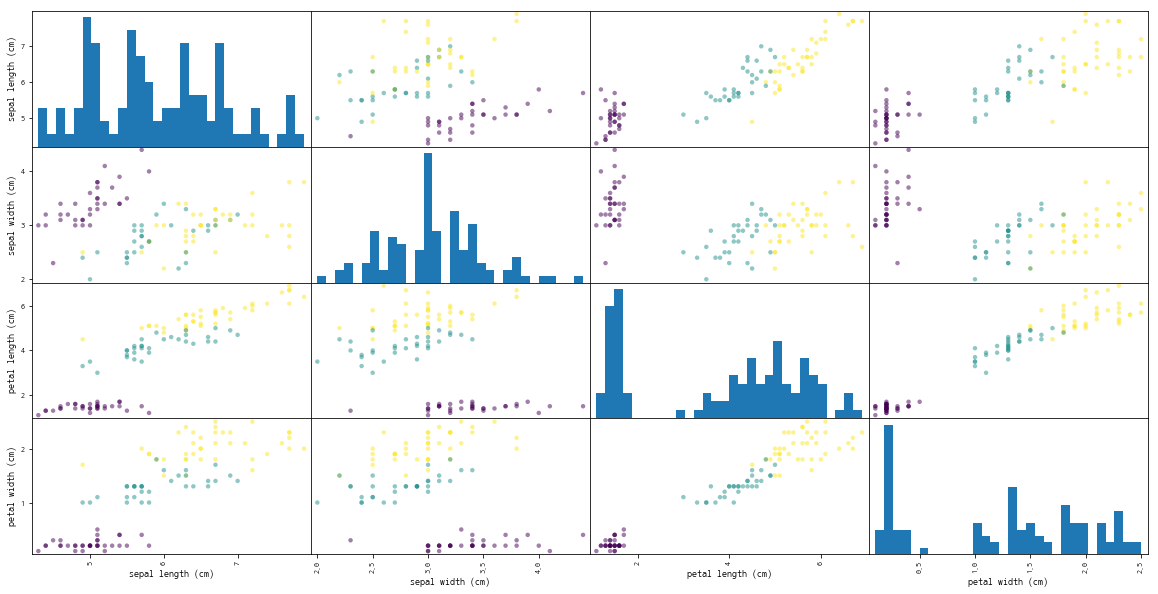

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas.plotting import scatter_matrix
iris_df = pd.DataFrame(x_train, columns=iris.feature_names)
scatter_matrix(iris_df,
                  c=y_train, # 색깔로 구분할 데이터
                  hist_kwds={'bins':30}, # 히스토그램
                  marker='o', # marker
                  s=20, # size
                  alpha=0.5,
              figsize=(20, 10)) # 투명도
plt.show()

In [9]:
k-NN algorithm은 가장 가까운 데이터 포인트중 n_neighbors만큼 이웃으로 삼아 예측으로 사용합니다.
다음은 k-NN algorithm 이웃수 1을 보여줍니다.

SyntaxError: invalid syntax (<ipython-input-9-1fbc0da9a1da>, line 1)

In [ ]:
import matplotlib.pyplot as plt
import mglearn
plt.figure(figsize=(20, 8))

feature_list = ["test0", "test1", "train0", "train1"]
plt.subplot(121)
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title('n_neighbors=1')
plt.legend(feature_list, loc="best")

plt.subplot(122)
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title('n_neighbors=3')
plt.legend(feature_list, loc="best")
plt.show()

이번에는 n_neighbors의 숫자에 따른 결정 경계를 그려보겠습니다.
먼저 임의로 데이터셋을 만들어보겠습니다.

In [ ]:
from mglearn.datasets import make_forge
x, y = make_forge()

_, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, ax in zip([1, 3, 9], axes.ravel()):
    knn = KNeighborsClassifier(i)
    knn.fit(x, y)
    mglearn.plots.plot_2d_separator(knn, x, fill=True,
                                    eps=0.5, alpha=0.5, ax=ax)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y=y, ax=ax)
    ax.set_title('k={}'.format(i))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=(0.01, 1.01))
plt.show()

이 그림을 보면 제일 왼쪽인 k=1일 경우에 모든 데이터를 가장 정확하게 분류했으며 그 경계는 복잡합니다.
k의 값이 커질수록 경계선은 점점 수평에 가까워지며 경계는 완만해짐을 알 수 있습니다.

>실제wine 데이터를 분석해보겠습니다.  
분석하기전에 wine데이터의 전체적인 구조를 pandas의 scatter_matrix를 이용해서  
확인해보겠습니다. 이 작업은 데이터틔 outlier가 있는지 쉽게 확인할 수 있는 장점이 있습니다.  

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
print(wine.keys())

* wine 데이터의 칼럼명입니다.

In [ ]:
for i in range(len(wine.feature_names)):
    print('{}:{}'.format(i, wine.feature_names[i]))

* wine 데이터를 데이터프레임으로 변환합니다.

In [ ]:
wine_df = pd.DataFrame(wine.data, columns=range(len(wine.feature_names)))

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(wine_df, # dataframe
                  c=wine.target, # color
                  hist_kwds={'bins':30}, # hist kwords
                  s=10, # size
                  alpha=0.5, # alpha
                  marker='o',
                  figsize=(20, 10)) # marker

plt.show()

그래프가 복잡해 보일지 모르겠지만 전체적인 구조를 한 눈에 파악할 수 있습니다.

데이터를 파악했으니 k-NN 최근접 이웃 algorithm, n_neighbors=3으로 데이터를 분석해보겠습니다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify=wine.target, # stratify = 계층화
                                                    random_state=0, test_size=0.3)  

knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1) # jobs =  사용할 코어의 수, -1 => 모든 코어
knn.fit(x_train, y_train)
print('accuracy : {:.3f}'.format(knn.score(x_test, y_test)))

## 모델의 복잡도와 일반화사이의 관계

위의 임의로 만든 데이터로 알아본 결과 모델의 복잡도를 알아보았는데 실제 데이터셋으로 모델의 복잡도와 정확도를 알아보겠습니다.

In [ ]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

wine = load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    stratify=wine.target, test_size=0.3, random_state=0)



train_list = []
test_list = []
n_range = range(1, 20)

for i in n_range:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    tr_score = knn.score(x_train, y_train)
    te_score = knn.score(x_test, y_test)
    train_list.append(tr_score)
    test_list.append(te_score)

plt.figure(figsize=(20, 10))    
plt.plot(n_range, train_list, color='red', ls='--', lw=2, label='train accuracy') # ls = linestyle, lw= linewidth
plt.plot(n_range, test_list, color='green', lw=2, label='test accuracy')
plt.xticks(n_range)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend() 
plt.show()

* 이웃의 수(n_neighbors)가 작을수록 모델이 복잡해지고 모델의 정확도는 100%입니다.  

* 그러나 예측 정확도는 0.7정도인 것을 알수있으며 이웃의 수를 증가시켜도 예측 정확도는 많이 늘어나지는 않습니다.  

* 따라서 이 데이터에는 k-NN 최근접 algorithm이 적합하지 않음을 알 수 있습니다.  



---  
참고 자료:   
[1]Introduction to Machine Learning with Python, Sarah Guido